In [1]:
import numpy as np
import pandas as pd
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# base de datos extraida de kaggle.com sobre lesiones en la NBA entre los años 2010 y 2020
injuries_df = pd.read_csv('injuries_2010-2020.csv')
injuries_df

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


In [3]:
injuries_df.describe()

,Date,Team,Acquired,Relinquished,Notes
count,27105,27103,9542,17560,27105
unique,2103,32,1111,1156,3114
top,2014-04-16,Spurs,Dwyane Wade,Kevin Love,activated from IL
freq,76,1163,54,101,7342


In [4]:
# trabajaremos sobre la cantidad de lesiones por año
# crearemos una columa 'Year'
injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')
injuries_df['Year'] = injuries_df['Date'].dt.year 
injuries_df

,Date,Team,Acquired,Relinquished,Notes,Year
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020


In [5]:
# muestra aleatoria simple
simple_df = injuries_df.sample(100)
simple_df

,Date,Team,Acquired,Relinquished,Notes,Year
4909,2012-04-26,Lakers,NaN,Andrew Bynum,rest (DNP),2012
14095,2016-01-02,Hornets,NaN,Nicolas Batum,sprained toe on right foot (DTD),2016
3851,2012-03-07,Cavaliers,NaN,Anderson Varejao,fractured bone in right wrist (DNP) (F),2012
15363,2016-03-31,Magic,NaN,Shabazz Napier,placed on IL,2016
1091,2011-01-09,Kings,NaN,Tyreke Evans,placed on IL with left foot injury / sprained ...,2011
...,...,...,...,...,...,...
8472,2013-12-27,Lakers,NaN,Steve Blake,torn ligament in right elbow (DNP),2013
1659,2011-02-21,Raptors,Solomon Alabi,NaN,activated from IL,2011
20399,2017-12-31,Celtics,Jaylen Brown,NaN,activated from IL,2017
19316,2017-11-01,Blazers,Noah Vonleh,NaN,activated from IL,2017


In [6]:
simple_df.describe()

,Year
count,100.000000
mean,2014.900000
std,2.972942
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2020.000000


In [7]:
simple_df['Year'].value_counts().sort_index(ascending=True)

2010     7
2011     8
2012    11
2013    14
2014     7
2015     5
2016    13
2017    11
2018    12
2019     6
2020     6
Name: Year, dtype: int64

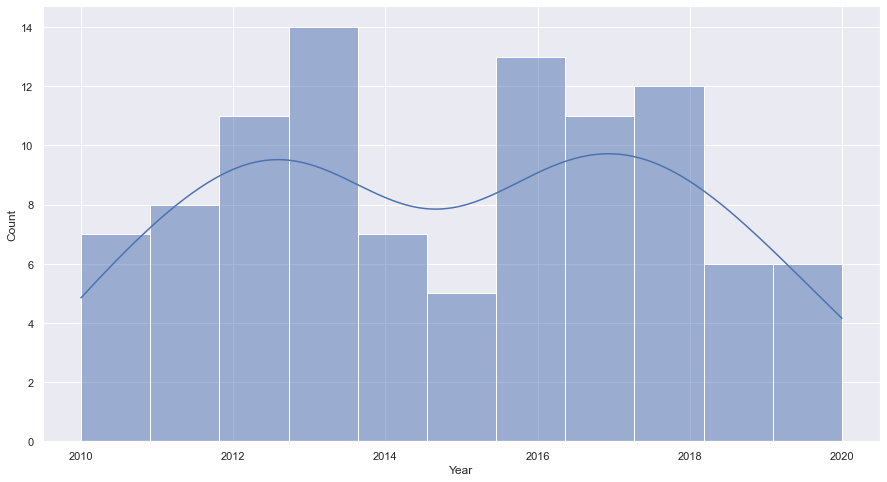

In [8]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=simple_df, x='Year', kde=True, bins=11)
plt.show()

In [9]:
# muestra sistematica
ini = 1537
step = 84
sistem_df = injuries_df[ini:len(injuries_df):step]
sistem_df

,Date,Team,Acquired,Relinquished,Notes,Year
1537,2011-02-10,Nuggets,NaN,Melvin Ely,placed on IL,2011
1621,2011-02-16,Cavaliers,Alonzo Gee,NaN,activated from IL,2011
1705,2011-02-25,Cavaliers,NaN,Semih Erden,placed on IL,2011
1789,2011-02-28,Nuggets,Kenyon Martin,NaN,activated from IL,2011
1873,2011-03-06,Knicks,NaN,Bill Walker,placed on IL with sore left knee,2011
...,...,...,...,...,...,...
26737,2020-03-11,Pistons,NaN,Bruce Brown,sprained right ankle (out for season),2020
26821,2020-07-31,Wizards,Isaac Bonga,NaN,activated from IL,2020
26905,2020-08-08,Thunder,Mike Muscala,NaN,activated from IL,2020
26989,2020-08-12,Thunder,Nerlens Noel,NaN,activated from IL,2020


In [10]:
sistem_df.describe()

,Year
count,305.000000
mean,2015.481967
std,2.589294
min,2011.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2020.000000


In [11]:
sistem_df['Year'].value_counts().sort_index(ascending=True)

2011    15
2012    37
2013    32
2014    34
2015    32
2016    35
2017    40
2018    35
2019    29
2020    16
Name: Year, dtype: int64

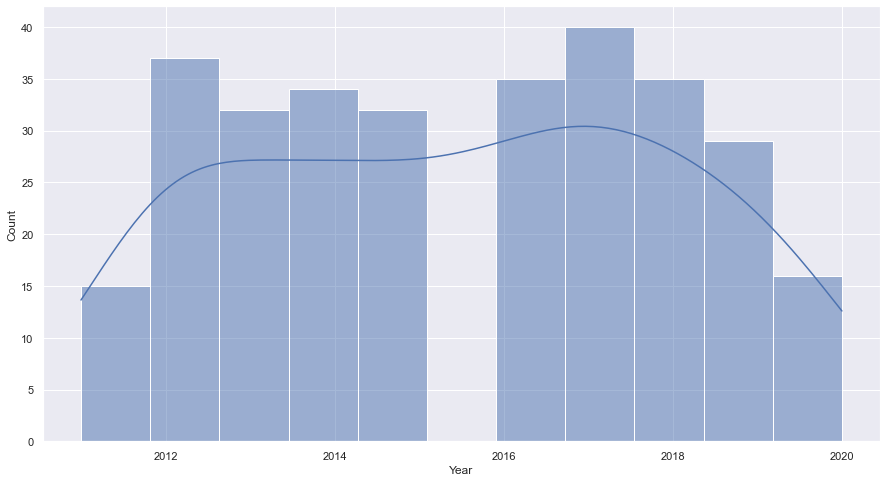

In [12]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=sistem_df, x='Year', kde=True, bins=11)
plt.show()

In [13]:
# muestra estratificada 
injuries_df.isna().sum()

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
Year                0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(injuries_df, test_size=0.20, stratify=injuries_df[['Year']])
Xtrain

,Date,Team,Acquired,Relinquished,Notes,Year
14865,2016-02-26,Cavaliers,NaN,Mo Williams,left knee injury (DTD),2016
26776,2020-07-30,Lakers,Dwight Howard,NaN,activated from IL,2020
22970,2018-12-07,Cavaliers,NaN,George Hill,placed on IL with returned to lineup,2018
9862,2014-03-31,Clippers,NaN,Jamal Crawford,left calf injury (DNP),2014
23135,2018-12-16,Wizards,NaN,Kelly Oubre Jr.,placed on IL,2018
...,...,...,...,...,...,...
3456,2012-02-09,Nuggets,NaN,Danilo Gallinari,sprained left ankle (DNP),2012
10344,2014-04-19,Grizzlies,NaN,Quincy Pondexter,placed on IL (out for season),2014
17488,2017-01-25,Warriors,Andre Iguodala,NaN,activated from IL,2017
23775,2019-02-01,Heat,Dwyane Wade,NaN,returned to lineup,2019


In [15]:
Xtrain.describe()

,Year
count,21684.000000
mean,2015.199041
std,2.769879
min,2010.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2020.000000


In [16]:
Xtrain['Year'].value_counts().sort_index(ascending=True)

2010     777
2011    1406
2012    2506
2013    2139
2014    2269
2015    2165
2016    2377
2017    2688
2018    2347
2019    1954
2020    1056
Name: Year, dtype: int64

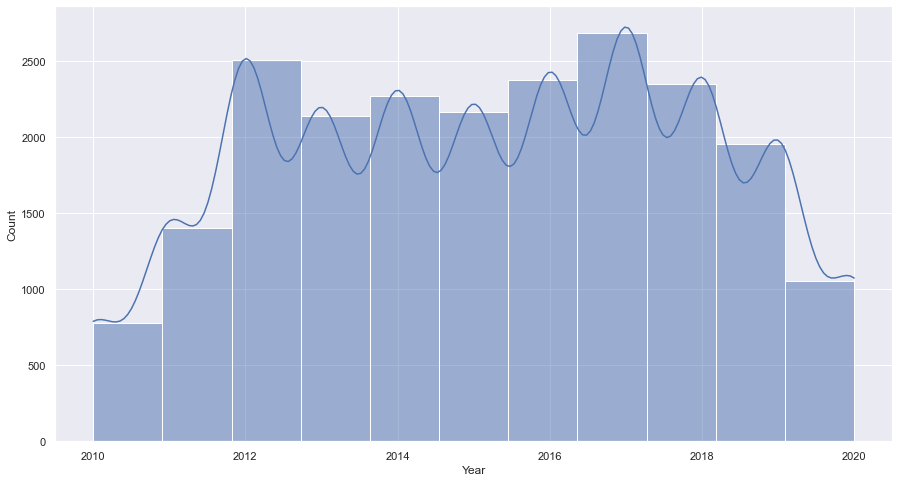

In [17]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=Xtrain, x='Year', kde=True, bins=11)
plt.show()

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE

In [19]:
injuries_df2 = injuries_df.copy()
injuries_df2

,Date,Team,Acquired,Relinquished,Notes,Year
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020


In [26]:
# creamos una nueva columna con las decadas
injuries_df2['Decade'] = (injuries_df2['Year']//10)*10
injuries_df2['Decade'] = injuries_df2['Decade'].astype(str)
injuries_df2

,Date,Team,Acquired,Relinquished,Notes,Year,Decade
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010,2010
...,...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020,2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020,2020


In [27]:
injuries_df2['Decade'].unique()

array(['2010', '2020'], dtype=object)

In [28]:
injuries_df2['Decade'].value_counts()

2010    25785
2020     1320
Name: Decade, dtype: int64

In [53]:
# convierto los valores de decada en 2010 = 0 y 2020 = 1
injuries_df2['Decade'] = [0 if x == '2010' else 1 for x in injuries_df2['Decade']]
injuries_df2

,Date,Team,Acquired,Relinquished,Notes,Year,Decade
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,1
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,1
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,1
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,1
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010,1
...,...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020,1
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020,1
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020,1
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020,1


In [51]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(injuries_df2, injuries_df2['Decade'])
X_sm

TypeError: float() argument must be a string or a number, not 'Timestamp'